## In this notebook, we will classify different balls based on the image.

## We will import all the required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import cv2 as cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report

## Unzip the dataset so that we can use it in our notebook

In [2]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Sanskar__02/balls.zip
!unzip -qo balls.zip
!rm balls.zip

--2021-11-21 13:43:36--  https://cainvas-static.s3.amazonaws.com/media/user_data/Sanskar__02/balls.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.115
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13505976 (13M) [application/zip]
Saving to: ‘balls.zip’

balls.zip           100%[===================>]  12.88M  --.-KB/s    in 0.08s   

2021-11-21 13:43:36 (152 MB/s) - ‘balls.zip’ saved [13505976/13505976]



In [3]:
directory = "balls"

In [4]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['basketball', 'tennis ball', 'cricket ball', '.DS_Store', 'paint balls', 'marble']
6


In [5]:
Name.remove('.DS_Store')
Name[1], Name[2], Name[4] = Name[2], Name[4], Name[1]
print(Name)

['basketball', 'cricket ball', 'marble', 'paint balls', 'tennis ball']


In [6]:
balls_map = dict(zip(Name, [t for t in range(len(Name))]))
print(balls_map)
r_balls_map=dict(zip([t for t in range(len(Name))],Name)) 

{'basketball': 0, 'cricket ball': 1, 'marble': 2, 'paint balls': 3, 'tennis ball': 4}


In [7]:
def mapper(value):
    return r_balls_map[value]

## Displaying some images from our dataset.

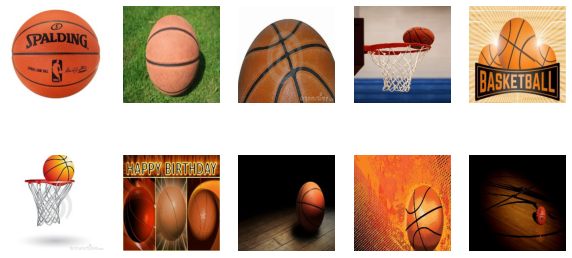

In [8]:
balls = 'balls/basketball'
import os 
sub_class = os.listdir(balls)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:10])):
    plt.subplot(2,5,e+1)
    img = plt.imread(os.path.join(balls,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.axis('off')

In [9]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)

## Divide the training dataset into train set and validation set.

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = img_datagen.flow_from_directory(directory,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

Found 464 images belonging to 5 classes.


In [11]:
valid_generator = img_datagen.flow_from_directory(directory,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 114 images belonging to 5 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation,BatchNormalization
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

## Train a sequential model.

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(5))
# model.add(Dense(len(brand_map)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=valid_generator,batch_size= 32,epochs=20)

Epoch 1/20
15/15 [==============================] - 12s 828ms/step - loss: 1.5677 - accuracy: 0.2306 - val_loss: 1.5412 - val_accuracy: 0.2632
Epoch 2/20
15/15 [==============================] - 12s 807ms/step - loss: 1.4180 - accuracy: 0.3922 - val_loss: 1.2785 - val_accuracy: 0.4474
Epoch 3/20
15/15 [==============================] - 12s 814ms/step - loss: 1.3046 - accuracy: 0.4440 - val_loss: 1.2419 - val_accuracy: 0.5351
Epoch 4/20
15/15 [==============================] - 12s 807ms/step - loss: 1.1591 - accuracy: 0.4828 - val_loss: 1.2265 - val_accuracy: 0.5702
Epoch 5/20
15/15 [==============================] - 12s 806ms/step - loss: 1.1452 - accuracy: 0.5409 - val_loss: 1.2011 - val_accuracy: 0.6491
Epoch 6/20
15/15 [==============================] - 12s 806ms/step - loss: 1.0187 - accuracy: 0.6272 - val_loss: 1.0174 - val_accuracy: 0.6316
Epoch 7/20
15/15 [==============================] - 12s 805ms/step - loss: 0.9635 - accuracy: 0.6530 - val_loss: 1.0216 - val_accuracy: 0.6404

# Plot curves

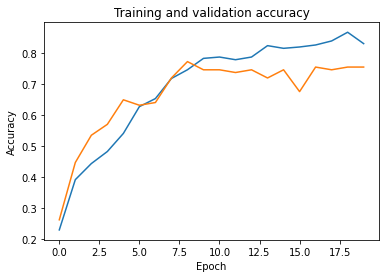

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.show()

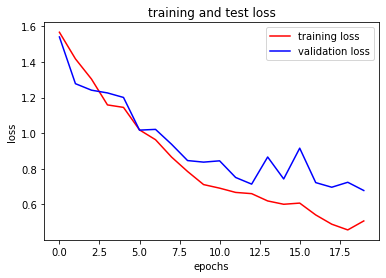

In [16]:
training_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
plt.plot(training_accuracy, 'r', label = 'training loss')
plt.plot(validation_accuracy, 'b', label = 'validation loss')
plt.title('training and test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Making Prediction

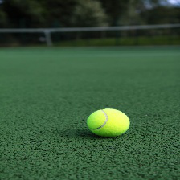

In [17]:
from tensorflow.keras.preprocessing.image import load_img
load_img("balls/tennis ball/001.jpg",target_size=(180,180))

### Randomly select an image from the test set and feed it to our model to make predictions.

In [18]:
image=load_img("balls/marble/008.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [19]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is marble.


# Deep CC

In [20]:
model.save('saved_models/balls.tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_models/balls.tf/assets


In [21]:
!deepCC 'saved_models/balls.tf'

[INFO]
Reading [tensorflow model] 'saved_models/balls.tf'
[SUCCESS]
Saved 'balls_deepC/balls.tf.onnx'
[INFO]
Reading [onnx model] 'balls_deepC/balls.tf.onnx'
[INFO]
Model info:
  ir_vesion : 4
  doc       : 
[WARNING]
[ONNX]: terminal (input/output) conv2d_input's shape is less than 1. Changing it to 1.
[WARNING]
[ONNX]: terminal (input/output) activation_1's shape is less than 1. Changing it to 1.
[INFO]
Running DNNC graph sanity check ...
[SUCCESS]
Passed sanity check.
[INFO]
Writing C++ file 'balls_deepC/balls.cpp'
[INFO]
deepSea model files are ready in 'balls_deepC/' 
[RUNNING COMMAND]
g++ -std=c++11 -O3 -fno-rtti -fno-exceptions -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 "balls_deepC/balls.cpp" -D_AITS_MAIN -o "balls_deepC/balls.exe"
[RUNNING COMMAND]
size "balls_deepC/balls.exe"
   text	   data	    bss